In [82]:
#importng librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [83]:
#Reading and Understanding the data
bikeSharing_df = pd.read_csv('C:\\Users\\Anu\\OneDrive\\Documents\\Python_Workspace\\Linear Regression Assignment\\day.csv')
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [84]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [85]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [86]:
#check the details of numeriacl data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [87]:
#check the columns of data
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [88]:
#check the size of data
bikeSharing_df.size

11680

In [89]:
#check the datatypes of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [90]:
#check the dimensions of data
bikeSharing_df.ndim

2

***Cleaning Data***

In [91]:
#Drop the columns that are not useful for analysis

#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [92]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [93]:
#Inspect data frame after dropping
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [94]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [95]:
bikeSharing_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [96]:
bikeSharing_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [97]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


***Handling Missing Values***

In [98]:
#Print null counts by column
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

***Handling Outliers***

In [99]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [100]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

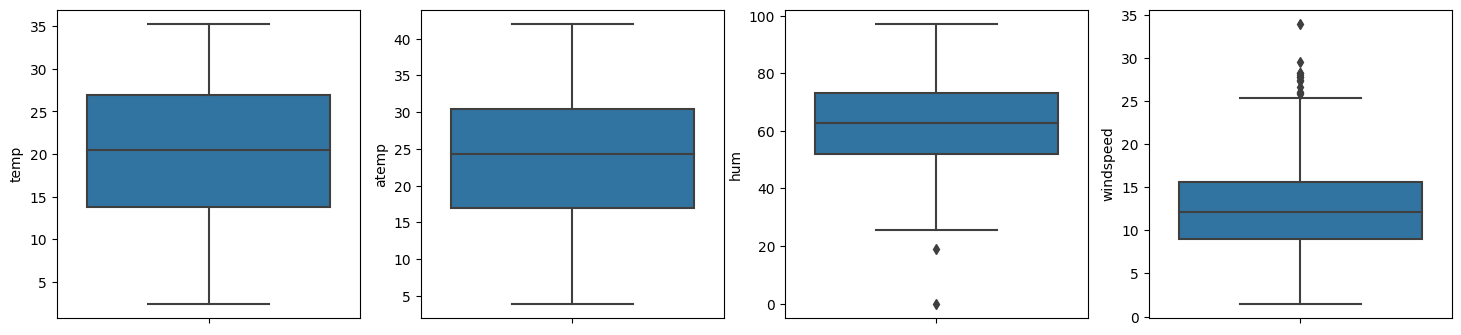

In [101]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

**From the above plots dont find any outliers**

<Figure size 1500x3000 with 0 Axes>

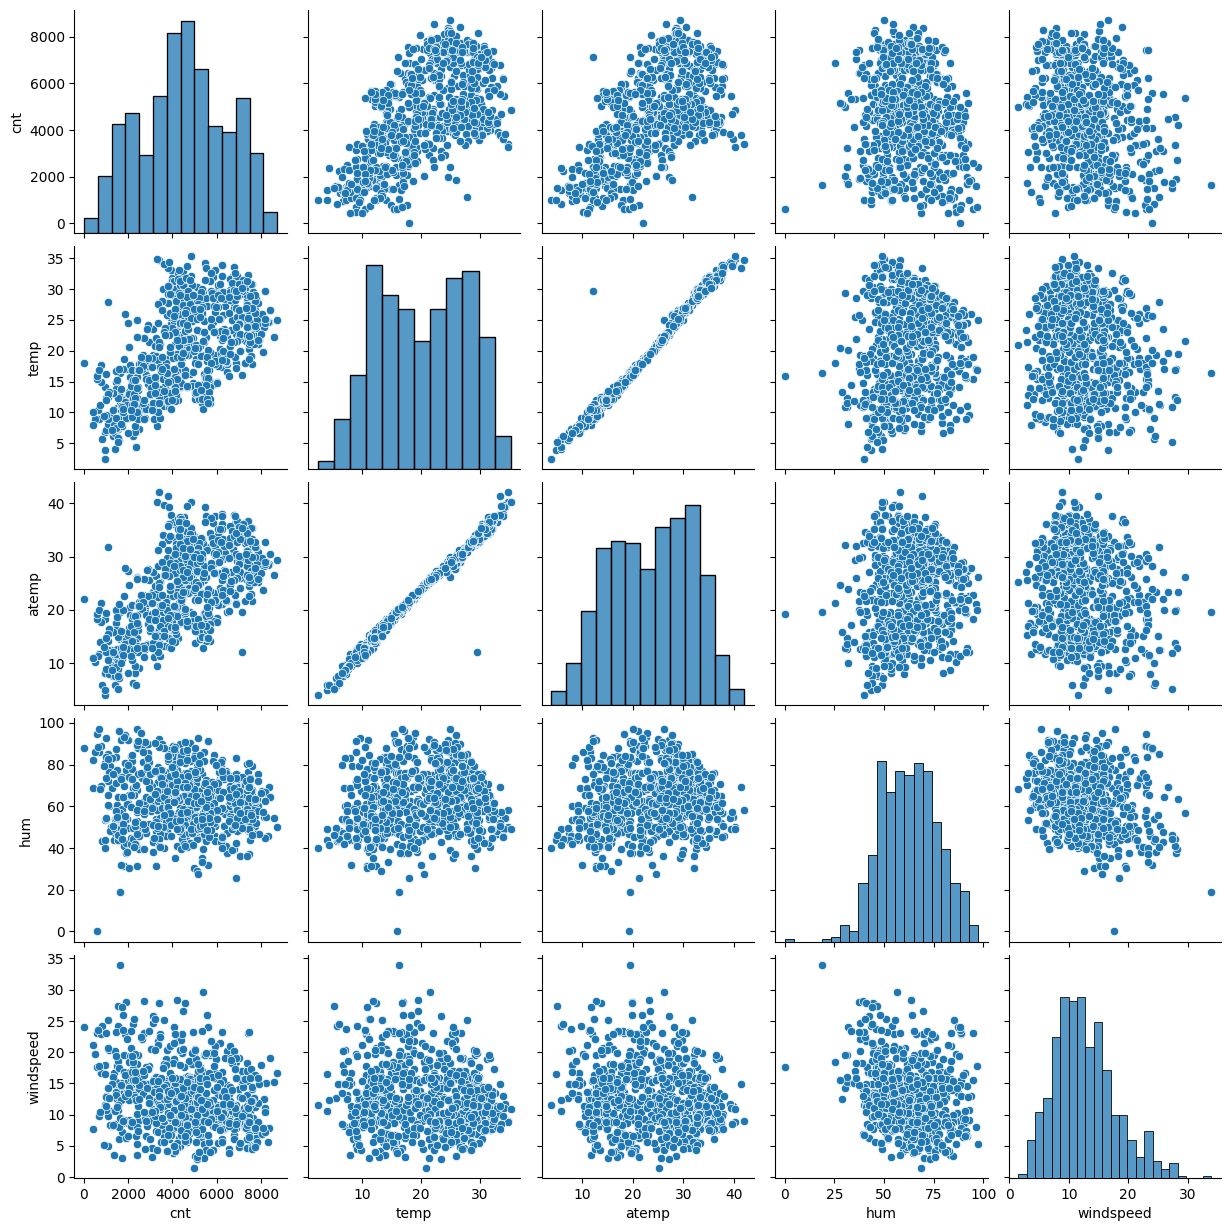

In [102]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#Looks like the temp and atemp has the highest corelation with the target variable cnt
#temp and atemp are highly co-related with each other

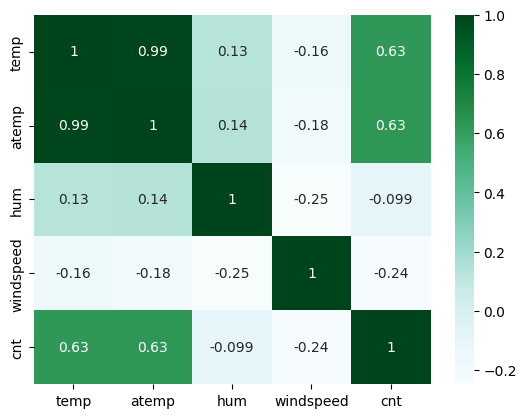

In [103]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

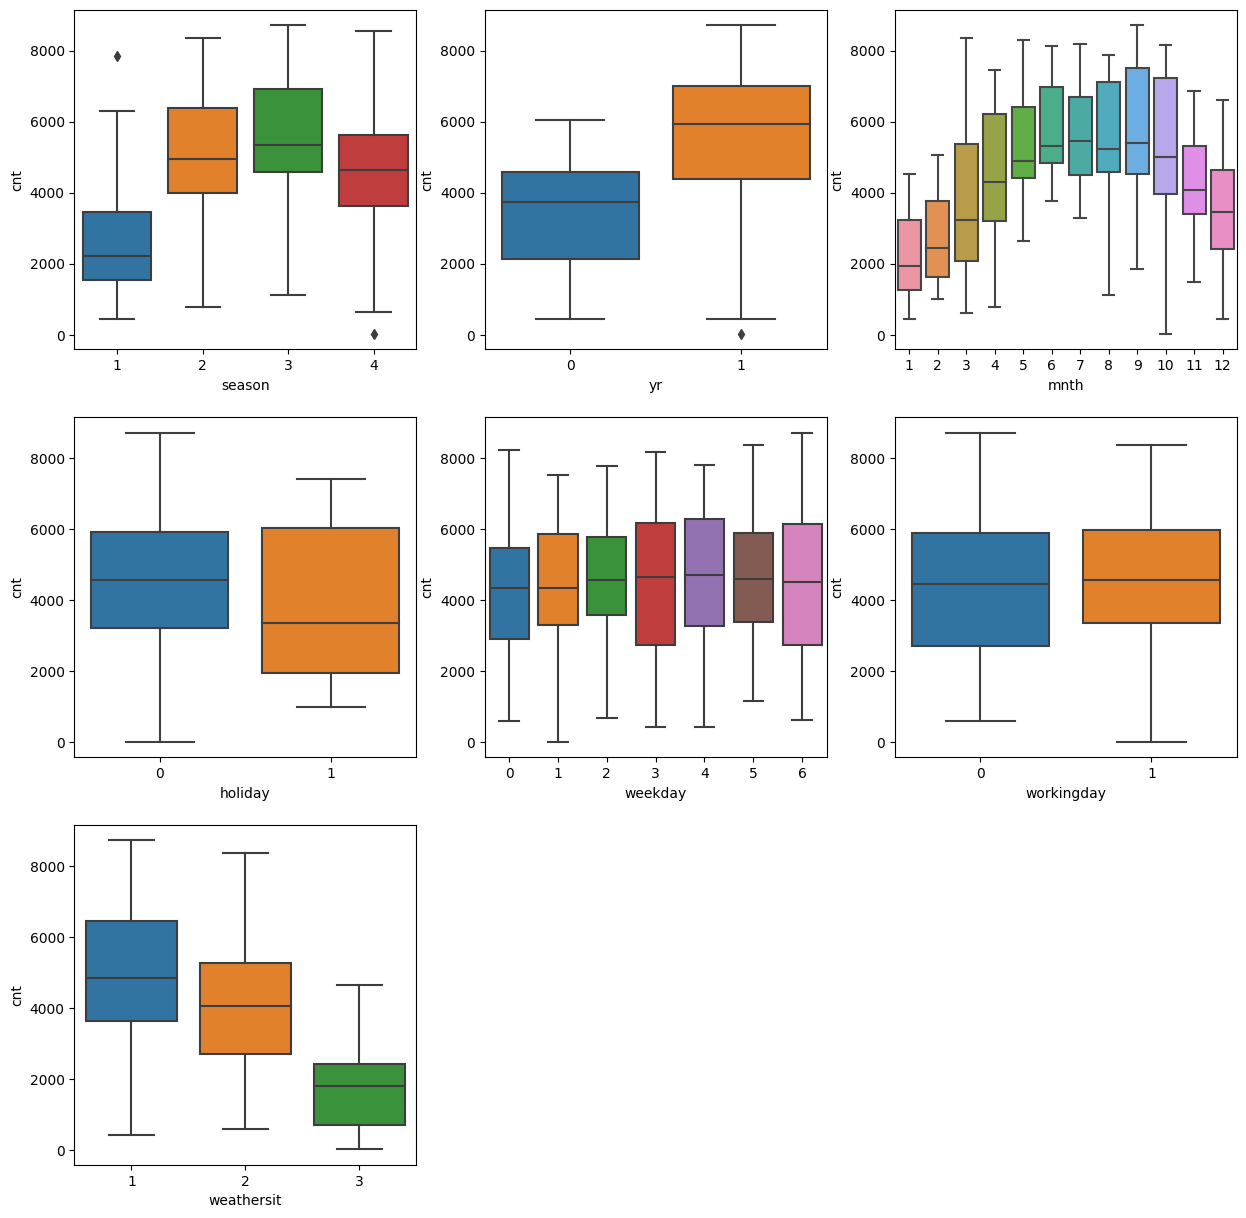

In [104]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()


Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

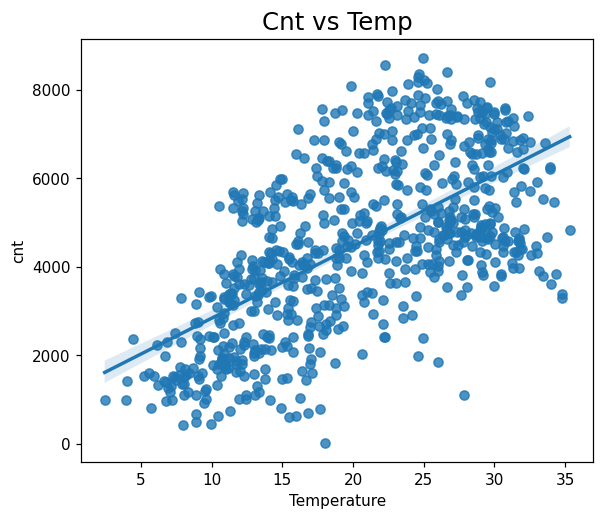

In [105]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Demand for bikes is positively correlated to temp.
We can see that cnt is linearly increasing with temp indicating linear relation.

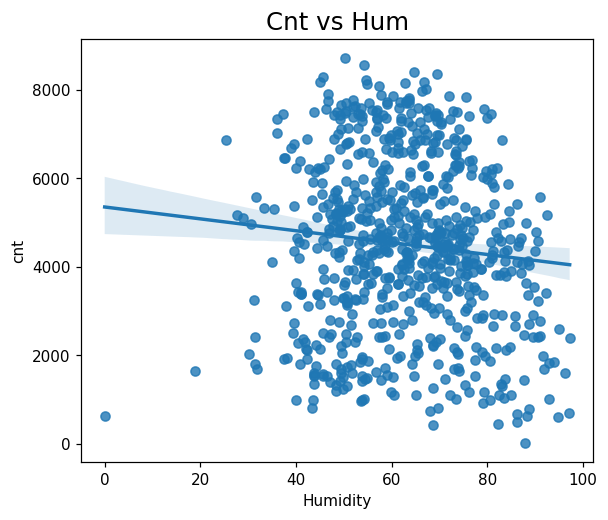

In [106]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Hum is values are more scattered around.
Although we can see cnt decreasing with increase in humidity.

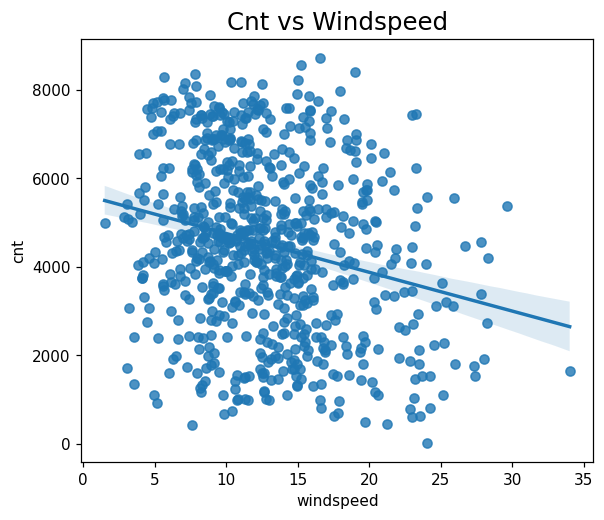

In [107]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

Windspeed is values are more scattered around.
Although we can see cnt decreasing with increase in windspeed.

***Data Preparation for Linear Regression***

In [108]:
#Plotting dummy variables
bikeSharing_df['spr_1']=np.where(bikeSharing_df['season']==1,1,0)
bikeSharing_df['Aut_2']=np.where(bikeSharing_df['season']==2,1,0)
bikeSharing_df['Sum_3']=np.where(bikeSharing_df['season']==3,1,0)

In [109]:
#Dropping the season as we had created dummy variables for it
bikeSharing_df=bikeSharing_df.drop(['season'],axis=1)
bikeSharing_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old,spr_1,Aut_2,Sum_3
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0


***Splitting the data in Train and test dataset***

In [110]:
df_train,df_test = train_test_split(bikeSharing_df,train_size=0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 15)
(146, 15)


***Scaling the variables***

In [111]:
#Initialise an object
scaler=MinMaxScaler()
num_var=['temp','cnt','mnth','weathersit','temp','atemp','hum','windspeed']

#fit on data using normalisation which min max 
df_train[num_var]= scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old,spr_1,Aut_2,Sum_3
367,1,0.000000,0,2,1,0.0,0.113228,0.061963,0.454701,0.695175,0.254717,367,1,0,0
648,1,0.818182,0,4,1,0.0,0.468352,0.462175,0.477458,0.299450,0.868385,648,0,0,0
44,0,0.090909,0,1,1,0.0,0.443431,0.419099,0.387290,0.807474,0.217556,44,1,0,0
705,1,1.000000,0,5,1,0.5,0.326094,0.318824,0.787463,0.189819,0.573631,705,0,0,0
379,1,0.000000,0,0,0,0.0,0.133996,0.108365,0.431945,0.449210,0.263346,379,1,0,0


In [112]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old,spr_1,Aut_2,Sum_3
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.504514,0.027397,2.940068,0.667808,0.198630,0.537414,0.513175,0.649499,0.319463,0.515792,369.976027,0.251712,0.246575,0.251712
std,0.500241,0.316099,0.163378,2.025948,0.471403,0.271452,0.225336,0.211663,0.144219,0.168114,0.225336,211.362563,0.434369,0.431387,0.434369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,1.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,186.750000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,3.000000,1.000000,0.000000,0.545191,0.530558,0.653714,0.294764,0.522837,374.500000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,5.000000,1.000000,0.500000,0.736512,0.690521,0.752361,0.410413,0.691872,553.250000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000,1.000000,1.000000,1.000000


<Axes: >

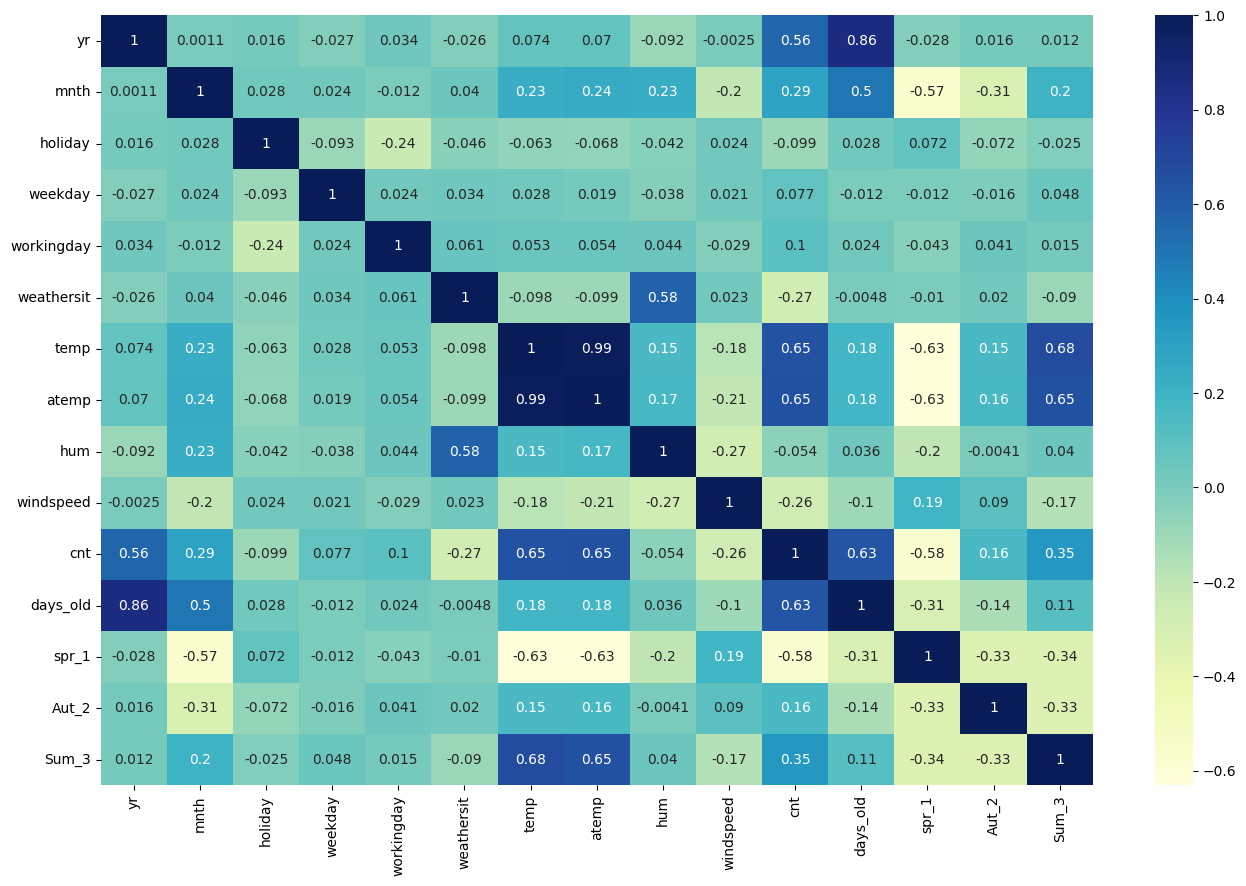

In [113]:
#Lets check the correlation coefficient
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True, cmap="YlGnBu")

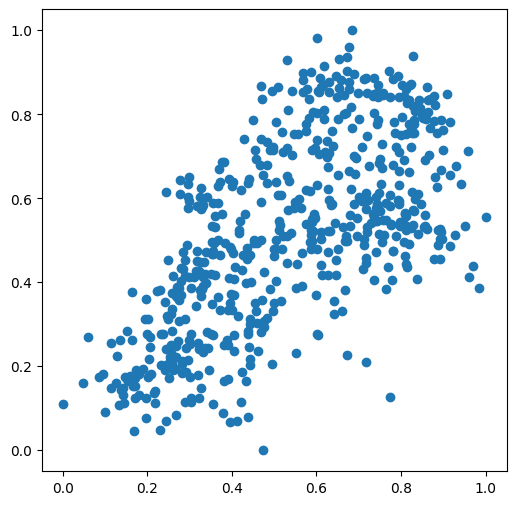

In [114]:
#cnt and temp are correlated
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

***Dividing X and y sets for model building***

In [115]:
#Xtrain and Ytrain
X_train=df_train
y_train=df_train.pop('cnt')

In [116]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,days_old,spr_1,Aut_2,Sum_3
367,1,0.000000,0,2,1,0.0,0.113228,0.061963,0.454701,0.695175,367,1,0,0
648,1,0.818182,0,4,1,0.0,0.468352,0.462175,0.477458,0.299450,648,0,0,0
44,0,0.090909,0,1,1,0.0,0.443431,0.419099,0.387290,0.807474,44,1,0,0
705,1,1.000000,0,5,1,0.5,0.326094,0.318824,0.787463,0.189819,705,0,0,0
379,1,0.000000,0,0,0,0.0,0.133996,0.108365,0.431945,0.449210,379,1,0,0


In [117]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

const    0.167419
temp     0.648239
dtype: float64

In [118]:
#Linear regression model
print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     421.8
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           6.57e-71
Time:                        10:03:58   Log-Likelihood:                 201.26
No. Observations:                 584   AIC:                            -398.5
Df Residuals:                     582   BIC:                            -389.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1674      0.018      9.104      0.0

In [119]:
#Adding another variable 
X_train_lm = sm.add_constant(X_train[['temp','yr']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     636.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.97e-147
Time:                        10:03:58   Log-Likelihood:                 380.94
No. Observations:                 584   AIC:                            -755.9
Df Residuals:                     581   BIC:                            -742.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0683      0.014      4.794      0.0

In [120]:
#Adding another variable as r2 is .437
X_train_lm = sm.add_constant(X_train[['temp','Sum_3','yr']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     445.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.91e-150
Time:                        10:03:58   Log-Likelihood:                 390.87
No. Observations:                 584   AIC:                            -773.7
Df Residuals:                     580   BIC:                            -756.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0364      0.016      2.318      0.0

In [121]:
#Adding another variable as r2 is .697
X_train_lm = sm.add_constant(X_train[['temp','Sum_3','yr','hum']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     354.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.31e-154
Time:                        10:03:58   Log-Likelihood:                 403.45
No. Observations:                 584   AIC:                            -796.9
Df Residuals:                     579   BIC:                            -775.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1430      0.026      5.473      0.0

In [122]:
#Adding another variable as r2 is 0.710
X_train_lm = sm.add_constant(X_train[['temp','Sum_3','yr','hum','mnth']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     337.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          7.77e-169
Time:                        10:03:58   Log-Likelihood:                 441.06
No. Observations:                 584   AIC:                            -870.1
Df Residuals:                     578   BIC:                            -843.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1307      0.025      5.320      0.0

In [123]:
#Adding another variable as r2 is 0.745
X_train_lm = sm.add_constant(X_train[['temp','Sum_3','yr','hum','mnth','Aut_2']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     286.8
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.71e-169
Time:                        10:03:58   Log-Likelihood:                 445.60
No. Observations:                 584   AIC:                            -877.2
Df Residuals:                     577   BIC:                            -846.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1341      0.024      5.490      0.0

In [124]:
#Adding another variable as r2 is 0.749
X_train_lm = sm.add_constant(X_train[['temp','Sum_3','yr','hum','mnth','Aut_2','windspeed']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     288.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.00e-183
Time:                        10:03:58   Log-Likelihood:                 481.84
No. Observations:                 584   AIC:                            -947.7
Df Residuals:                     576   BIC:                            -912.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2706      0.028      9.736      0.0

In [125]:
#Adding another variable
X_train_lm = sm.add_constant(X_train[['temp','Sum_3','yr','hum','mnth','Aut_2','windspeed','weekday']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     260.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.96e-185
Time:                        10:03:58   Log-Likelihood:                 488.77
No. Observations:                 584   AIC:                            -959.5
Df Residuals:                     575   BIC:                            -920.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.028      8.656      0.0

In [126]:
#Adding another variable
X_train_lm = sm.add_constant(X_train[['temp','Sum_3','yr','hum','mnth','Aut_2','windspeed','weekday','workingday','mnth']])

# Create a first fitted model
fm = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

fm.params

print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     234.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          9.37e-186
Time:                        10:03:58   Log-Likelihood:                 492.39
No. Observations:                 584   AIC:                            -964.8
Df Residuals:                     574   BIC:                            -921.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2323      0.029      8.125      0.0

In [127]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.340723
yr            0.462611
mnth          0.205070
holiday      -0.071998
weekday       0.009134
workingday    0.021194
weathersit   -0.159121
temp          0.413962
atemp         0.097701
hum          -0.110381
windspeed    -0.184117
days_old     -0.000639
spr_1        -0.171885
Aut_2        -0.048231
Sum_3        -0.095679
dtype: float64

In [128]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.77e-210
Time:                        10:03:58   Log-Likelihood:                 564.34
No. Observations:                 584   AIC:                            -1099.
Df Residuals:                     569   BIC:                            -1033.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3407      0.035      9.634      0.0

In [129]:
#VIF model
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,days_old,2248.28
0,yr,851.19
1,mnth,515.59
6,temp,422.81
7,atemp,404.03
8,hum,27.34
9,windspeed,4.76
13,Sum_3,4.76
11,spr_1,4.17
12,Aut_2,4.16


In [130]:
X_train.head()


,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,days_old,spr_1,Aut_2,Sum_3
367,1,0.000000,0,2,1,0.0,0.113228,0.061963,0.454701,0.695175,367,1,0,0
648,1,0.818182,0,4,1,0.0,0.468352,0.462175,0.477458,0.299450,648,0,0,0
44,0,0.090909,0,1,1,0.0,0.443431,0.419099,0.387290,0.807474,44,1,0,0
705,1,1.000000,0,5,1,0.5,0.326094,0.318824,0.787463,0.189819,705,0,0,0
379,1,0.000000,0,0,0,0.0,0.133996,0.108365,0.431945,0.449210,379,1,0,0


In [132]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.77e-210
Time:                        10:22:51   Log-Likelihood:                 564.34
No. Observations:                 584   AIC:                            -1099.
Df Residuals:                     569   BIC:                            -1033.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3407      0.035      9.634      0.0

In [133]:
X=X_train.drop('mnth',axis=1)

In [134]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,422.23
6,atemp,403.16
9,days_old,40.16
7,hum,27.06
0,yr,18.22
8,windspeed,4.74
12,Sum_3,4.72
11,Aut_2,4.06
10,spr_1,4.01
3,workingday,3.13


In [135]:
X=X.drop('atemp',axis=1)

In [136]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,days_old,40.10
6,hum,26.61
5,temp,21.64
0,yr,18.19
11,Sum_3,4.60
7,windspeed,4.58
10,Aut_2,4.06
9,spr_1,4.01
3,workingday,3.13
2,weekday,3.08


In [137]:
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     235.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.11e-212
Time:                        10:38:05   Log-Likelihood:                 563.05
No. Observations:                 584   AIC:                            -1100.
Df Residuals:                     571   BIC:                            -1043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3404      0.035      9.665      0.0

In [138]:
#Residual Analysis of Train Test
y_train_bike = lr_1.predict(X_train_lm)

<Axes: ylabel='Density'>

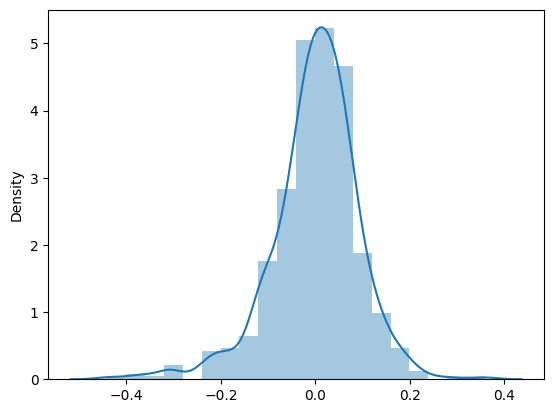

In [139]:
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)

In [140]:
#Dividing X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [141]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)
X_test.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,days_old,spr_1,Aut_2,Sum_3
184,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,184,0,0,1
535,1,6,0,3,1,1,32.082500,36.04875,59.2083,7.625404,535,0,1,0
299,0,10,0,4,1,2,19.270000,22.85230,81.2917,13.250121,299,0,0,0
221,0,8,0,3,1,1,31.433347,34.24915,42.4167,13.417286,221,0,0,1
152,0,6,0,4,1,1,29.315000,32.19710,30.5000,19.583229,152,0,1,0


In [142]:
X_test_m.head()

,const,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,days_old,spr_1,Aut_2,Sum_3
184,1.0,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,184,0,0,1
535,1.0,1,6,0,3,1,1,32.082500,36.04875,59.2083,7.625404,535,0,1,0
299,1.0,0,10,0,4,1,2,19.270000,22.85230,81.2917,13.250121,299,0,0,0
221,1.0,0,8,0,3,1,1,31.433347,34.24915,42.4167,13.417286,221,0,0,1
152,1.0,0,6,0,4,1,1,29.315000,32.19710,30.5000,19.583229,152,0,1,0


In [143]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     235.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.11e-212
Time:                        10:39:54   Log-Likelihood:                 563.05
No. Observations:                 584   AIC:                            -1100.
Df Residuals:                     571   BIC:                            -1043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3404      0.035      9.665      0.000       0.271       0.410
yr             0.2454      0.026      9.613      0.000       0.195       0.296
holiday       -0.0721      0.025     -2.930      0.004      -0.120      -0.024
weekday        0.0091      0.002      4.712      0.000       0.005       0.013
workingday     0.0209      0.008      2.470      0.014       0.004       0.038
weathersit    -0.1578      0.019     -8.493      0.000      -0.194      -0.121
temp           0.5083      0.032     15.948      0.000       0.446       0.571
hum           -0.1115      0.037     -3.000      0.003      -0.184      -0.038
windspeed     -0.1894      0.025     -7.586      0.000      -0.238      -0.140
days_old   -4.387e-05   6.67e-05     -0.658      0.511      -0.000    8.71e-05
spr_1         -0.1760      0.019     -9.068      0.000      -0.214      -0.138
Aut_2         -0.0515      0.017     -3.006      0.003      -0.085      -0.018
Sum_3         -0.0998      0.017     -5.990      0.000      -0.132      -0.067
==============================================================================
Omnibus:                       92.427   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.492
Skew:                          -0.795   Prob(JB):                     4.92e-54
Kurtosis:                       5.749   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
X_test_m = X_test_m.drop(["mnth", "atemp"], axis = 1)

In [145]:
y_pred_m = lr_1.predict(X_test_m)

Text(0.5, 0.98, 'y_test vs y_pred')

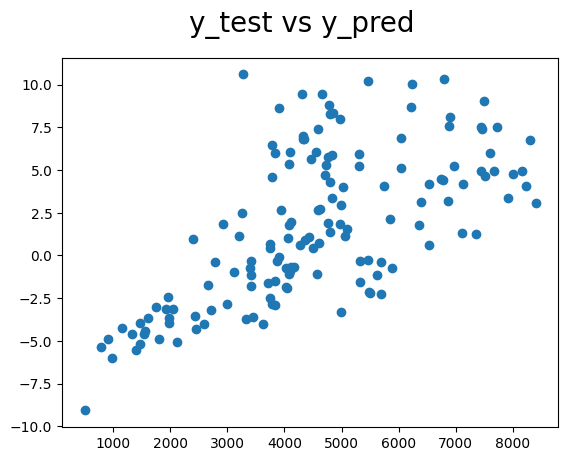

In [146]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)

In [147]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     235.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.11e-212
Time:                        10:45:47   Log-Likelihood:                 563.05
No. Observations:                 584   AIC:                            -1100.
Df Residuals:                     571   BIC:                            -1043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3404      0.035      9.665      0.000       0.271       0.410
yr             0.2454      0.026      9.613      0.000       0.195       0.296
holiday       -0.0721      0.025     -2.930      0.004      -0.120      -0.024
weekday        0.0091      0.002      4.712      0.000       0.005       0.013
workingday     0.0209      0.008      2.470      0.014       0.004       0.038
weathersit    -0.1578      0.019     -8.493      0.000      -0.194      -0.121
temp           0.5083      0.032     15.948      0.000       0.446       0.571
hum           -0.1115      0.037     -3.000      0.003      -0.184      -0.038
windspeed     -0.1894      0.025     -7.586      0.000      -0.238      -0.140
days_old   -4.387e-05   6.67e-05     -0.658      0.511      -0.000    8.71e-05
spr_1         -0.1760      0.019     -9.068      0.000      -0.214      -0.138
Aut_2         -0.0515      0.017     -3.006      0.003      -0.085      -0.018
Sum_3         -0.0998      0.017     -5.990      0.000      -0.132      -0.067
==============================================================================
Omnibus:                       92.427   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.492
Skew:                          -0.795   Prob(JB):                     4.92e-54
Kurtosis:                       5.749   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,days_old,40.10
6,hum,26.61
5,temp,21.64
0,yr,18.19
11,Sum_3,4.60
7,windspeed,4.58
10,Aut_2,4.06
9,spr_1,4.01
3,workingday,3.13
2,weekday,3.08
